<h1>Monthly Foreclosures Prediction <br>
Using Decision Tree Regression</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> Read data set, assign features and split into X and y </h2>

In [2]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [3]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]

print(X.shape)
print(y.shape)

df

(105, 12)
(105, 1)


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,isJan,mnth_sin,mnth_cos,DATE_DELTA
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,1,0.000000e+00,1.000000e+00,0.0
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,0,5.000000e-01,8.660254e-01,31.0
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,0,8.660254e-01,5.000000e-01,59.0
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,0,1.000000e+00,6.123234e-17,90.0
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,0,8.660254e-01,-5.000000e-01,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,0,8.660254e-01,-5.000000e-01,3042.0
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,0,5.000000e-01,-8.660254e-01,3073.0
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,0,1.224647e-16,-1.000000e+00,3103.0
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,0,-5.000000e-01,-8.660254e-01,3134.0


In [4]:
date_delta = X['DATE_DELTA']
feature_labels_less_Date =['mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
#feature_labels_less_Date =['CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']

names = {}
for i in range(0,len(feature_labels_less_Date)):
    names[i] = feature_labels_less_Date[i]

X = pd.DataFrame(preprocessing.scale(X[feature_labels_less_Date])).rename(columns = names)
X = X.join(date_delta)


In [5]:
X.shape

(105, 12)

<h2>Plot results</h2>

R_2: 0.6521551474859262, RMSE 367.29013055076774 i 0
R_2: 0.9597783733566813, RMSE 49.06322451694344 i 1
R_2: 0.3951066801674247, RMSE 494.80816484775187 i 2
R_2: 0.5274458115922909, RMSE 102.57563063418134 i 3
R_2: 0.43077928010194544, RMSE 456.1726780751147 i 4
R_2: 0.7880612430656838, RMSE 149.5839563589625 i 5
R_2: -2.5995109247013484, RMSE 559.5916050517953 i 6


<Figure size 640x480 with 0 Axes>

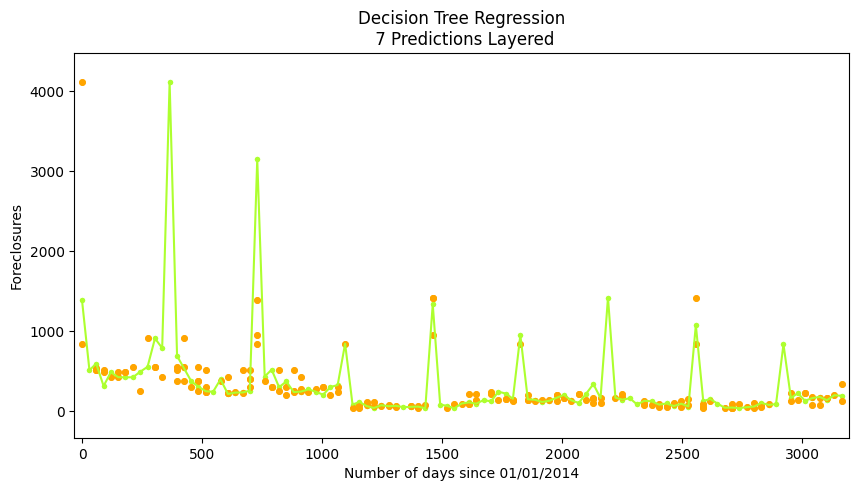

R_2 avg: 1.0588062434118835, RMSE 311.2979128622167 i 6


In [6]:
# Plot the results
avg_rmse = 0
avg_r2 = 0
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
for i in range(0,7):
    X_train, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
    regressor.fit(X_train,y_train)
    y_pred_3 = regressor.predict(X_test_3)
    plt.scatter(X_test_3['DATE_DELTA'], y_pred_3,s=15, c="orange")
    mse = metrics.mean_squared_error(y_test, y_pred_3)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred_3)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred_3))
    plt.scatter(X_test_3['DATE_DELTA'], y_pred_3,s=15, c="orange")


plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Decision Tree Regression\n 7 Predictions Layered")
plt.savefig('../plots/DecisionTreeRegression_Multiple_runs.png')
plt.show()
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")


R_2: 0.4836069847485588, RMSE 447.5140221266815 i 0


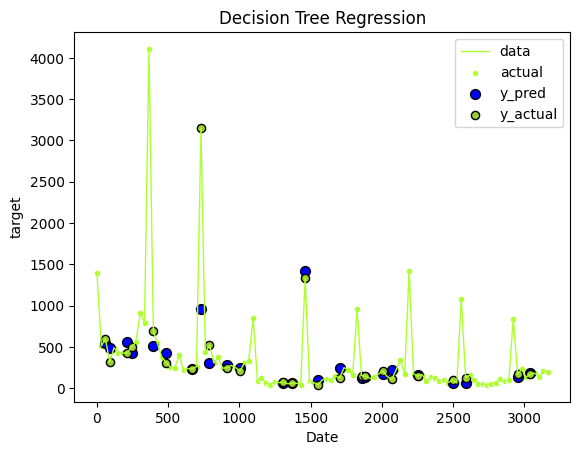

R_2: 0.452742441780721, RMSE 582.8916537402126 i 7


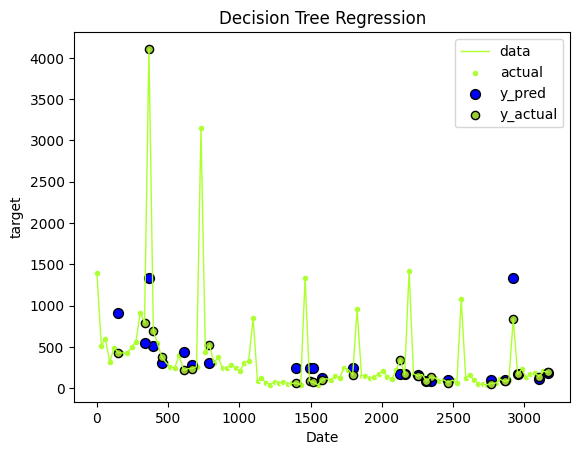

R_2: 0.6481121248324783, RMSE 392.63838607836374 i 14


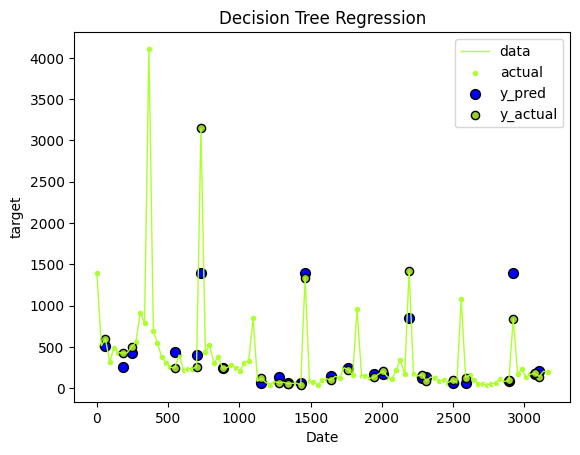

R_2: 0.5600042202028406, RMSE 170.93659643271243 i 21


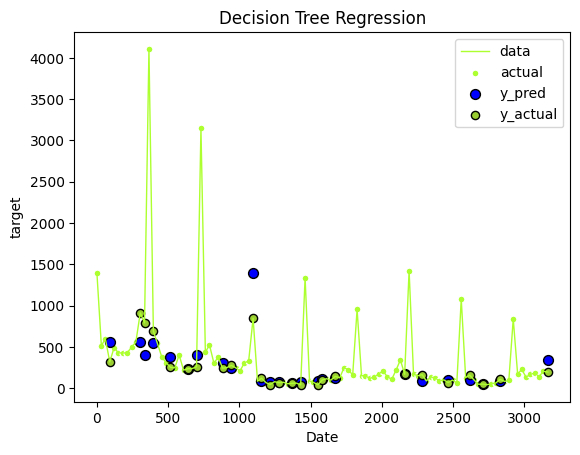

R_2: -2.2919982885034567, RMSE 550.8810760953766 i 28


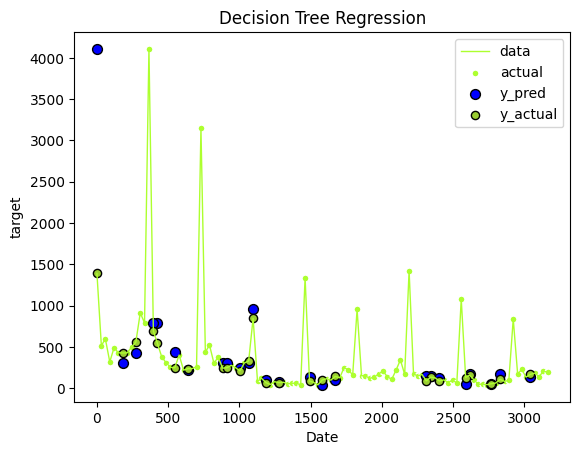

R_2: 0.46697644910014746, RMSE 486.5754971224918 i 35


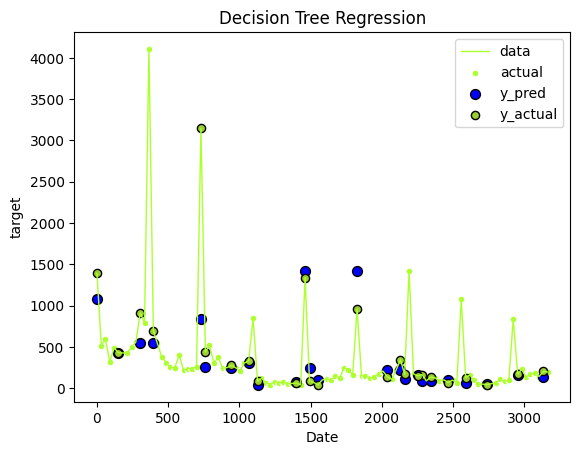

R_2: 0.41801005115442647, RMSE 620.5416504957584 i 42


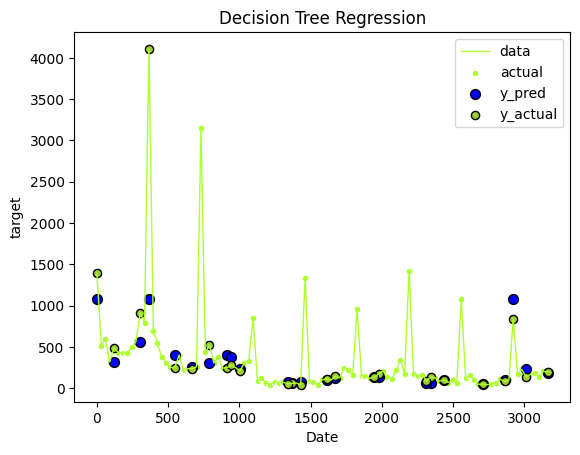

R_2: -0.8951213812718595, RMSE 486.38847128606983 i 49


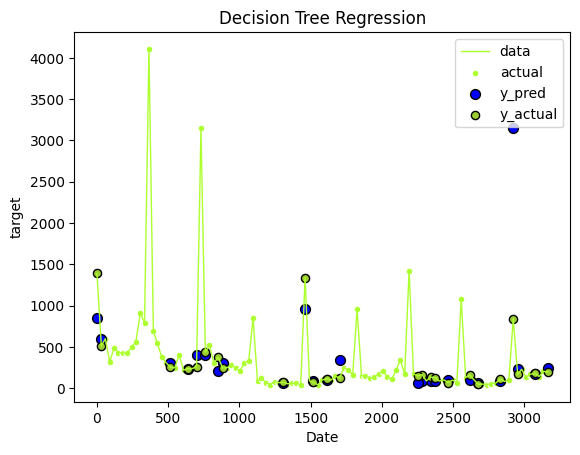

R_2: -2.759487838414133, RMSE 679.286618446146 i 56


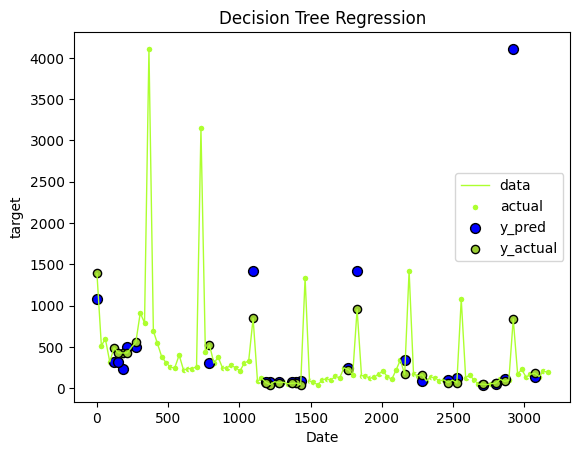

R_2: 0.5431113477588584, RMSE 144.40193904515272 i 63


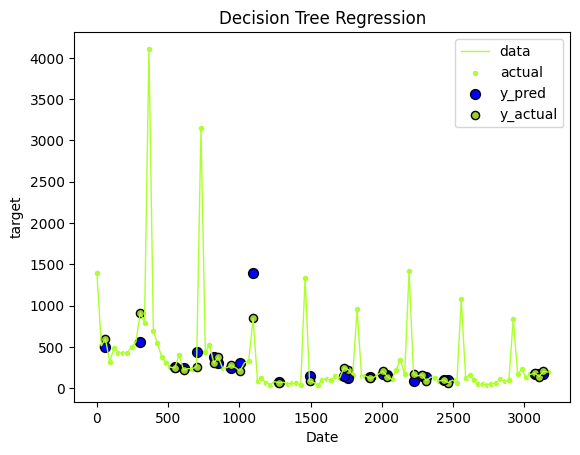

R_2: 0.8569644609324649, RMSE 97.89157267099145 i 70


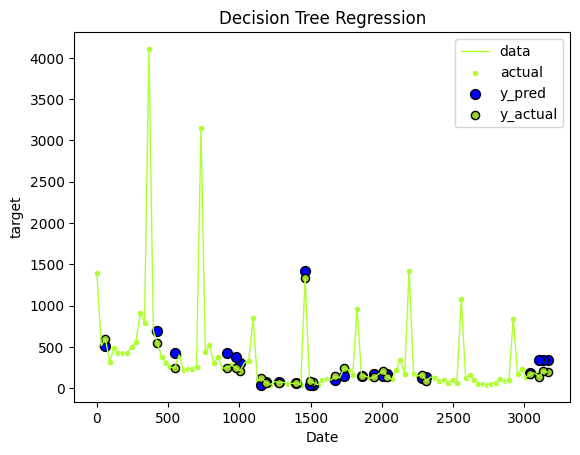

R_2: 0.5157799898247013, RMSE 555.789420554224 i 77


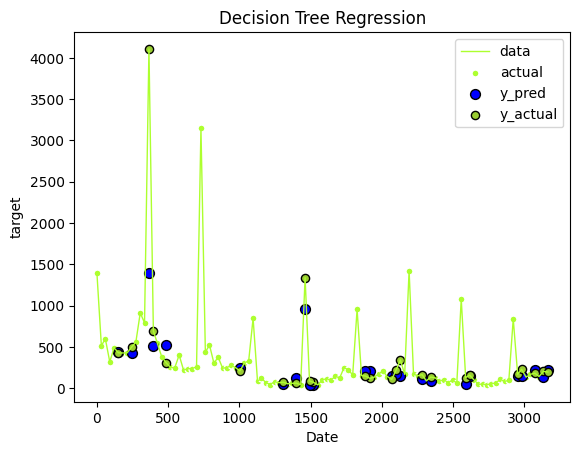

R_2: -3.850696322679047, RMSE 477.6576598359959 i 84


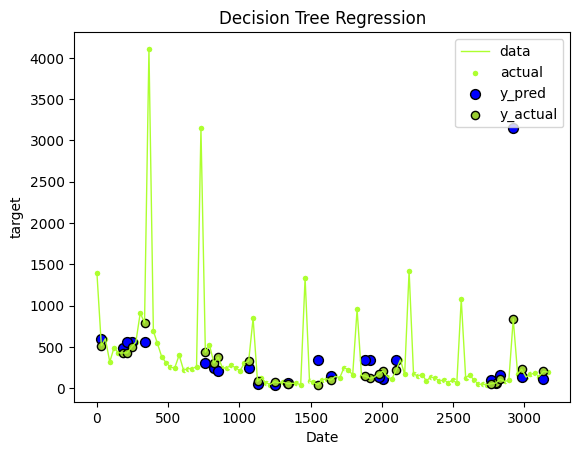

R_2: 0.43187917414146637, RMSE 492.36980258744546 i 91


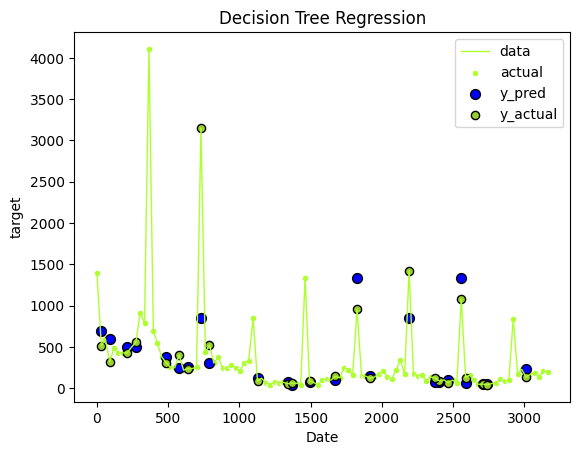

R_2: 0.8448654615124743, RMSE 128.76585123566124 i 98


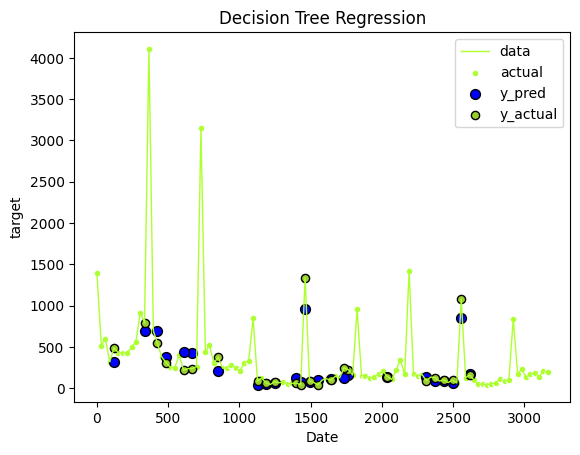

R_2: -4.7141319116139755, RMSE 479.7210856320577 i 105


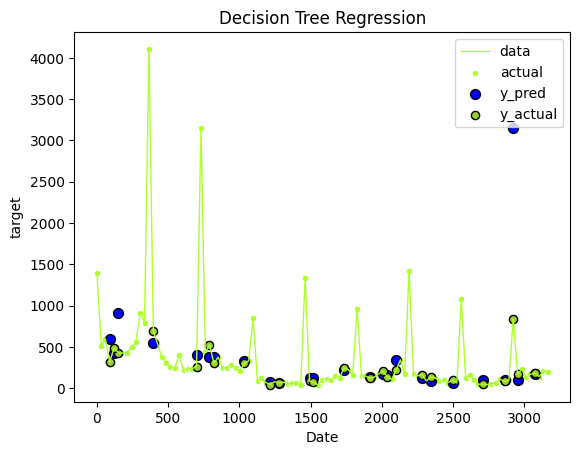

R_2: -2.249540850433618, RMSE 562.6511174786734 i 112


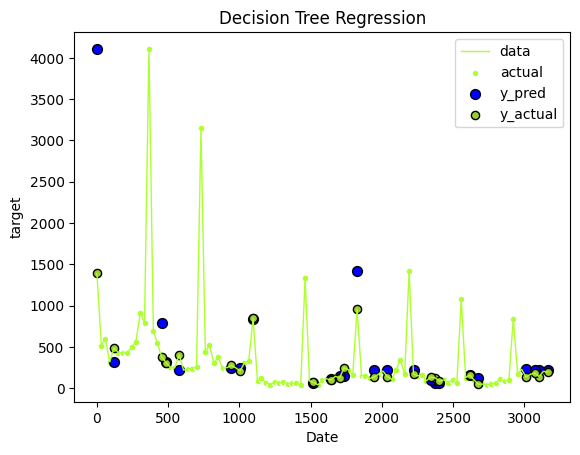

R_2: -1.0360900365342869, RMSE 552.9044763790577 i 119


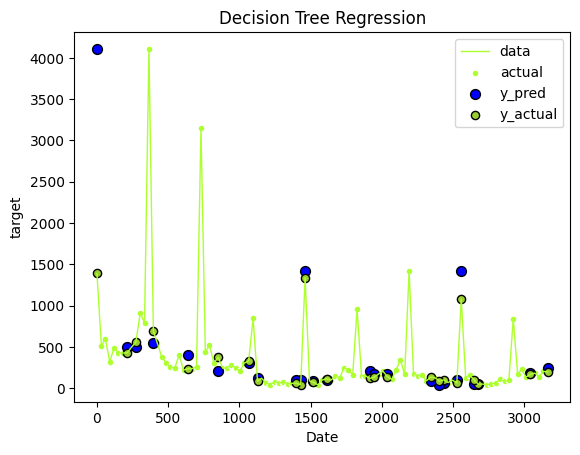

R_2 avg: 0.20184133895327322, RMSE 65.91505747702561 i 119


In [62]:
import matplotlib.pyplot as plt
avg_rmse = 0
avg_r2 = 0
for i in range(0,122,7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    #regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
    regressor = DecisionTreeRegressor(max_depth=12, random_state=1, min_weight_fraction_leaf=0.01)#, criterion=i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    y_pred
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred))
        # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")


R_2: -1.0360900365342869, RMSE 552.9044763790577 i 119


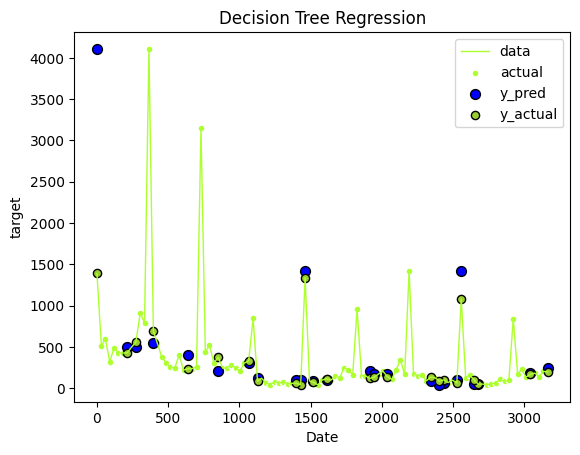

In [63]:
   
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred))
        # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

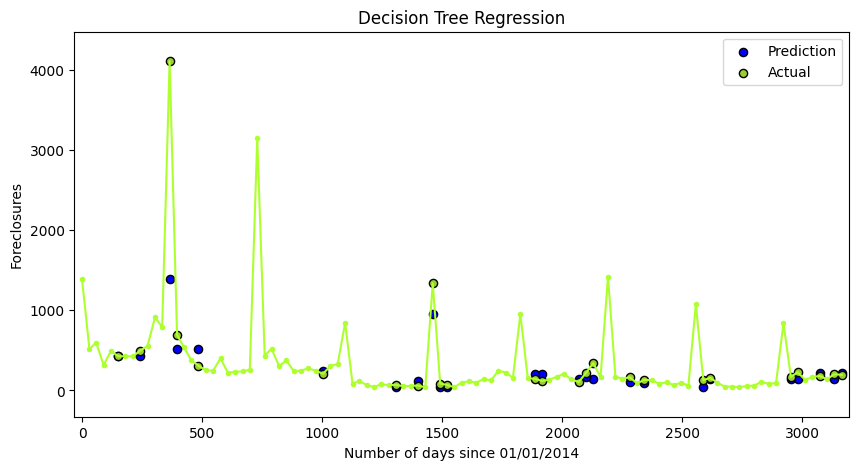

In [65]:
# Plot the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=77)
#regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
regressor = DecisionTreeRegressor(max_depth=12, random_state=1, min_weight_fraction_leaf=0.01)#, criterion=i)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=35, edgecolor="black", c="blue", label="Prediction")
plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="Actual")

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Decision Tree Regression")
plt.legend()
plt.savefig('../plots/DecisionTreeRegression.png')
plt.show()